In [8]:
import os
import json
import matplotlib.pyplot as plt


In [9]:

# Base directory containing all results
n1_dir = f'1n_gateway_results_100bs'
n2_dir = f'2n_gateway_results_100bs'
n4_dir = f'4n_gateway_results_100bs'
n8_dir = f'8n_gateway_results_100bs'
n10_dir = f'10n_gateway_results_100bs'

In [10]:
# Helper to convert bytes into readable KB/MB/GB
def format_bytes(num_bytes):
    if num_bytes >= 1024 ** 3:
        return f"{num_bytes / (1024 ** 3):.1f} GB"
    elif num_bytes >= 1024 ** 2:
        return f"{num_bytes / (1024 ** 2):.1f} MB"
    elif num_bytes >= 1024:
        return f"{num_bytes / 1024:.1f} KB"
    else:
        return f"{num_bytes} B"

# Helper function to plot bandwidth and IOPS with color per xfersize
def plot_with_xfersize(ax_bw, ax_iops, data, title, color_map):
    if not data:
        return

    unique_xfersizes = sorted(set(xfersize for _, _, xfersize, _ in data))
    colors = plt.cm.tab10.colors
    xfersize_to_color = {xf: colors[i % len(colors)] for i, xf in enumerate(unique_xfersizes)}

    for xf in unique_xfersizes:
        xs = [t for t, _, x, _ in data if x == xf]
        ys_bw = [b for _, b, x, _ in data if x == xf]
        ys_iops = [i for _, _, x, i in data if x == xf]
        label = f'xfersize {format_bytes(xf)}'

        ax_bw.scatter(xs, ys_bw, label=label, color=xfersize_to_color[xf])
        ax_iops.scatter(xs, ys_iops, label=label, color=xfersize_to_color[xf])

    ax_bw.set_title(title + " [BW]")
    ax_bw.set_xlabel('Tasks Per Node')
    ax_bw.set_ylabel('Mean BW (MiB/s)')
    ax_bw.grid(True)

    ax_iops.set_title(title + " [IOPS]")
    ax_iops.set_xlabel('Tasks Per Node')
    ax_iops.set_ylabel('Mean IOPS')
    ax_iops.grid(True)

    ax_bw.legend()

def plot_ior_perf(base_dir, plot_title='1 Node Write BW and IOPS vs TasksPerNode'):
    write_data = []  # list of (tasks_per_node, bw_mean, xfersize, iops)
    read_data = []

    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.json'):
                json_path = os.path.join(root, file)
                with open(json_path, 'r') as f:
                    try:
                        data = json.load(f)
                        if 'summary' in data:
                            for entry in data['summary']:
                                op = entry.get('operation')
                                tasks_per_node = entry.get('tasksPerNode')
                                bw_mean = entry.get('bwMeanMIB')
                                xfersize = entry.get('transferSize')
                                iops = entry.get('OPsMean')

                                if op == 'write':
                                    write_data.append((tasks_per_node, bw_mean, xfersize, iops))
                                elif op == 'read':
                                    read_data.append((tasks_per_node, bw_mean, xfersize, iops))
                    except Exception as e:
                        print(f"Error loading file: {file}: {e}")

    plt.figure(figsize=(10, 6))

    # Write plots
    ax1 = plt.subplot(2, 2, 1)
    ax2 = plt.subplot(2, 2, 2)
    plot_with_xfersize(ax1, ax2, write_data, plot_title + " [Write]", plt.cm.Blues)

    # Read plots
    ax3 = plt.subplot(2, 2, 3)
    ax4 = plt.subplot(2, 2, 4)
    plot_with_xfersize(ax3, ax4, read_data, plot_title + " [Read]", plt.cm.Greens)

    plt.tight_layout()
    figure_name = plot_title.replace(' ', '_') + ".pdf"
    plt.savefig(figure_name)
    plt.show()

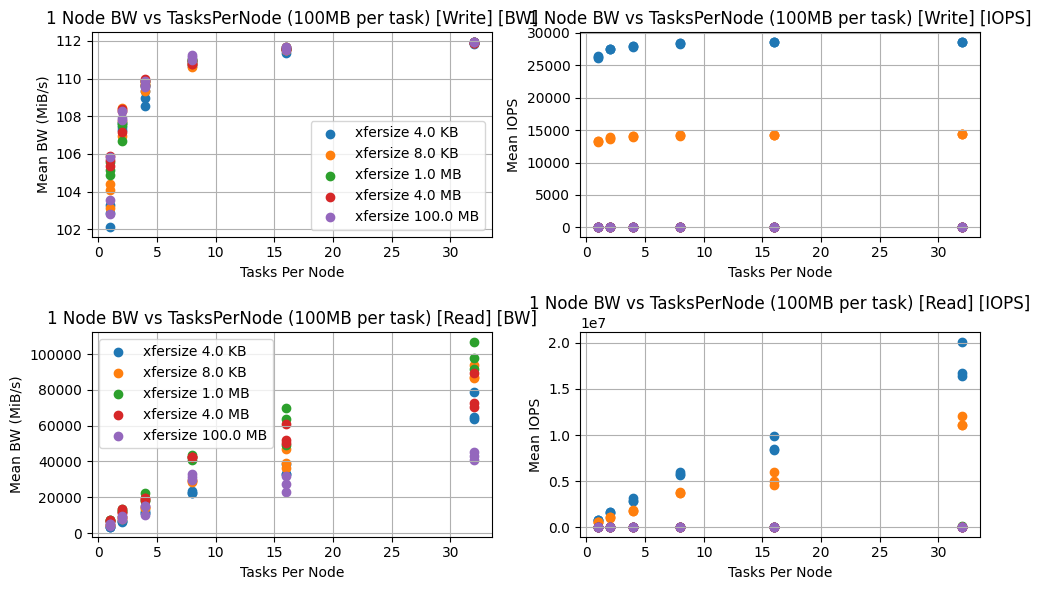

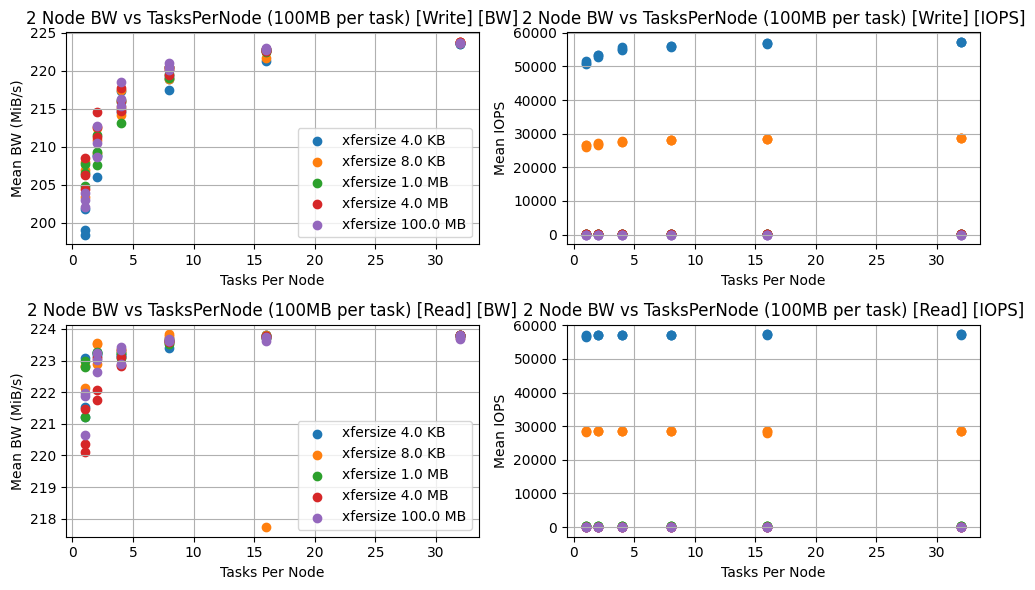

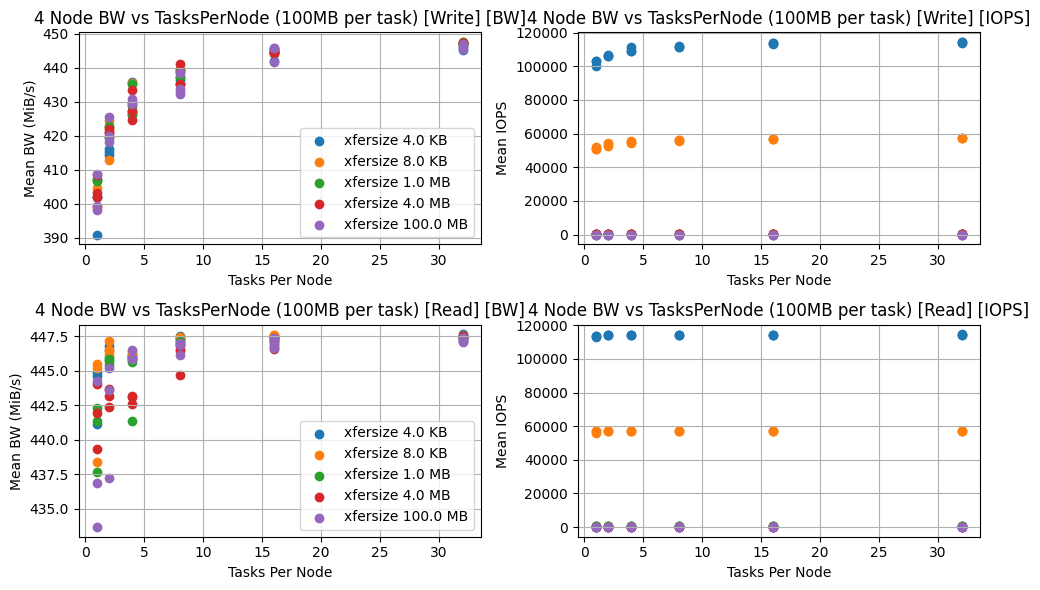

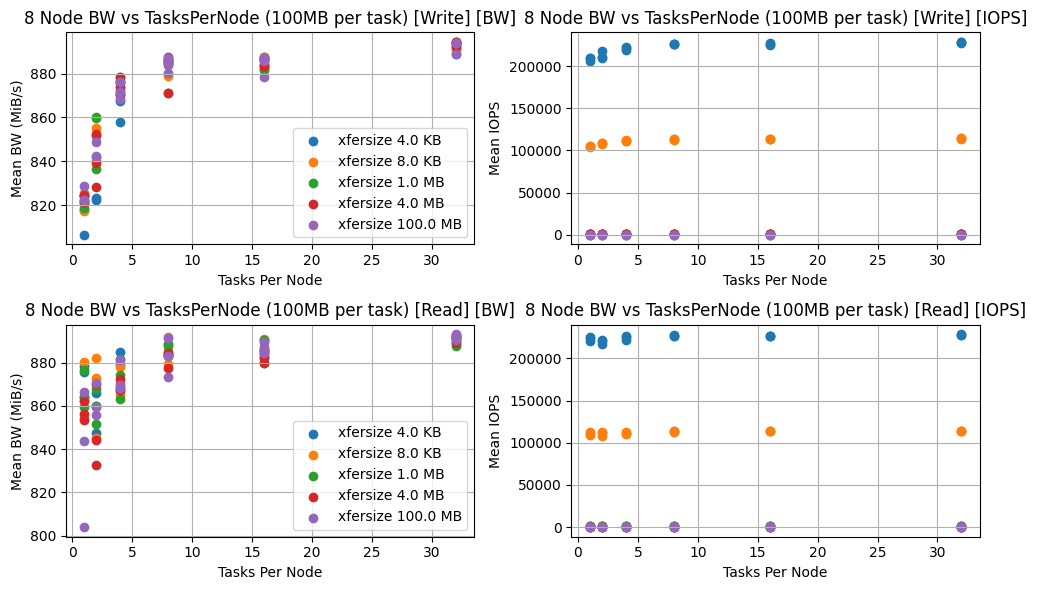

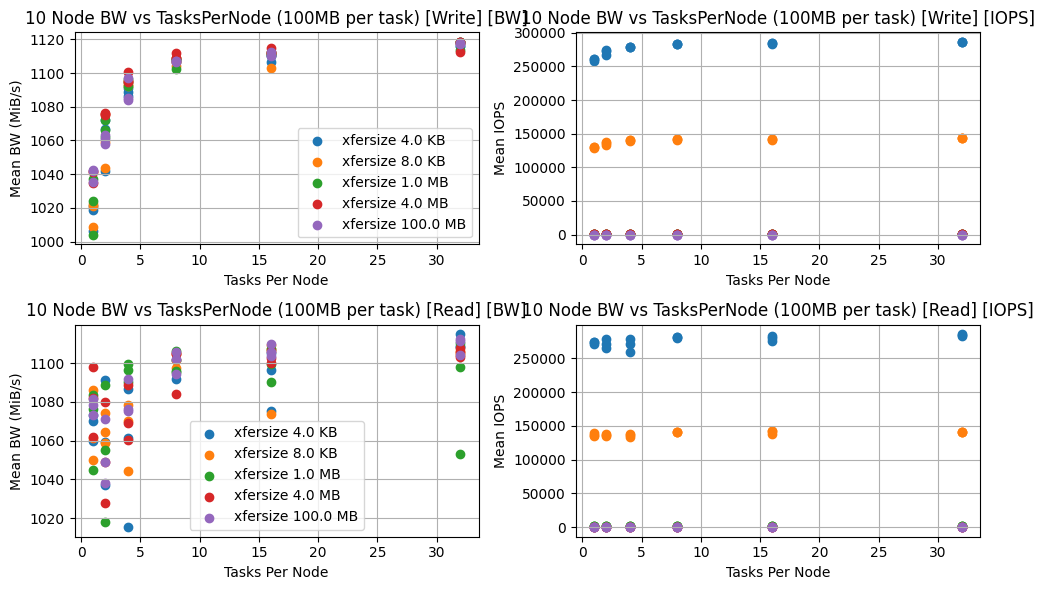

In [11]:
plot_ior_perf(n1_dir, '1 Node BW vs TasksPerNode (100MB per task)')
plot_ior_perf(n2_dir, '2 Node BW vs TasksPerNode (100MB per task)')
plot_ior_perf(n4_dir, '4 Node BW vs TasksPerNode (100MB per task)')
plot_ior_perf(n8_dir, '8 Node BW vs TasksPerNode (100MB per task)')

plot_ior_perf(n10_dir, '10 Node BW vs TasksPerNode (100MB per task)')

Loading CP bandwidth data...
Found 6 CP result directories
Processing directory: 8n_gateway_cp_results_100bs
  8n_gateway_cp_results_100bs/8n_result_cp_4_ts1m_bs100m_t3 -> nodes:8, tasks:4, upload:200.0, download:88.88
  8n_gateway_cp_results_100bs/8n_result_cp_1_ts1m_bs100m_t2 -> nodes:8, tasks:1, upload:53.33, download:44.44
  8n_gateway_cp_results_100bs/8n_result_cp_16_ts1m_bs100m_t2 -> nodes:8, tasks:16, upload:426.66, download:109.4
  8n_gateway_cp_results_100bs/8n_result_cp_2_ts1m_bs100m_t1 -> nodes:8, tasks:2, upload:66.66, download:64.0
  8n_gateway_cp_results_100bs/8n_result_cp_4_ts1m_bs100m_t1 -> nodes:8, tasks:4, upload:123.07, download:84.21
  8n_gateway_cp_results_100bs/8n_result_cp_32_ts1m_bs100m_t3 -> nodes:8, tasks:32, upload:544.68, download:112.28
  8n_gateway_cp_results_100bs/8n_result_cp_1_ts1m_bs100m_t3 -> nodes:8, tasks:1, upload:57.14, download:47.05
  8n_gateway_cp_results_100bs/8n_result_cp_8_ts1m_bs100m_t1 -> nodes:8, tasks:8, upload:213.33, download:98.46
  8

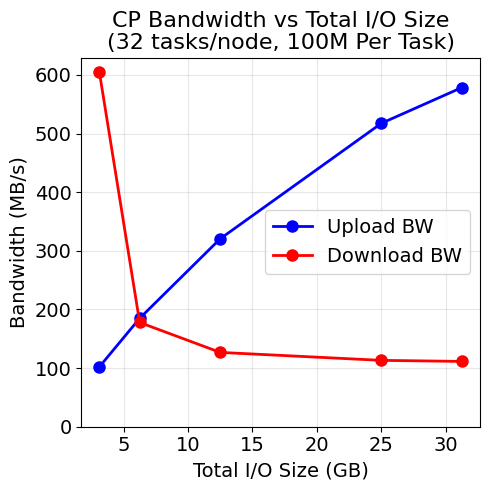

Plot 1 Summary:
Nodes  Total I/O Size  Total Tasks  Upload (MB/s)   Download (MB/s)
-----------------------------------------------------------------
1      3.1 GB          32           102.1           604.4          
2      6.2 GB          64           184.8           177.8          
4      12.5 GB         128          320.5           126.7          
8      25.0 GB         256          517.4           113.2          
10     31.2 GB         320          578.4           111.4          

=== Plot 2: 10 nodes, varying tasks per node ===


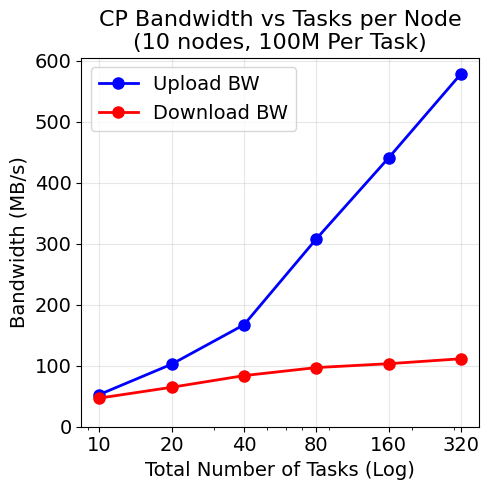

Plot 2 Summary:
Tasks/Node Total Tasks  Upload (MB/s)   Download (MB/s)
----------------------------------------------------
1          10           52.8            46.9           
2          20           102.5           64.7           
4          40           167.1           83.8           
8          80           307.9           96.9           
16         160          440.7           103.3          
32         320          578.4           111.4          

Total configurations processed: 30


In [12]:
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict

def parse_bandwidth_log(filepath):
    """Parse bandwidth from log file"""
    try:
        with open(filepath, 'r') as f:
            line = f.readline().strip()
            # Parse lines like "Download bandwidth: 25.00 MB/s (Total: 100.00 MB in 4s, Files: 1)"
            match = re.search(r'(Download|Upload) bandwidth: ([\d.]+) MB/s', line)
            if match:
                operation = match.group(1).lower()
                bandwidth = float(match.group(2))
                return operation, bandwidth
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
    return None, None

def extract_test_info(folder_path):
    """Extract node count and tasks per node from folder path"""
    # Extract from paths like '8n_gateway_cp_results_100bs/8n_result_cp_32_ts1m_bs100m_t1'
    parts = folder_path.split('/')
    if len(parts) >= 2:
        base_folder = parts[0]  # e.g., '8n_gateway_cp_results_100bs'
        result_folder = parts[1]  # e.g., '8n_result_cp_32_ts1m_bs100m_t1'
        
        # Extract number of nodes from base folder
        node_match = re.search(r'^(\d+)n_', base_folder)
        if not node_match:
            return None, None
        num_nodes = int(node_match.group(1))
        
        # Extract tasks per node from result folder
        task_match = re.search(r'_cp_(\d+)_ts', result_folder)
        if not task_match:
            return None, None
        tasks_per_node = int(task_match.group(1))
        
        return num_nodes, tasks_per_node
    
    return None, None

def load_cp_data():
    """Load all CP bandwidth data"""
    data = defaultdict(lambda: defaultdict(list))  # data[num_nodes][tasks_per_node] = [(upload_bw, download_bw), ...]
    
    # Find all directories with cp results
    cp_dirs = []
    for item in os.listdir('.'):
        if os.path.isdir(item) and '_cp_' in item:
            cp_dirs.append(item)
    
    print(f"Found {len(cp_dirs)} CP result directories")
    
    for cp_dir in cp_dirs:
        # Skip the r2 directories for now to avoid duplicates, or handle them separately
        if '_r2' in cp_dir:
            continue
            
        print(f"Processing directory: {cp_dir}")
        
        # Find all result subdirectories
        if not os.path.exists(cp_dir):
            continue
            
        for subdir in os.listdir(cp_dir):
            subdir_path = os.path.join(cp_dir, subdir)
            if not os.path.isdir(subdir_path):
                continue
                
            # Extract test info
            num_nodes, tasks_per_node = extract_test_info(f"{cp_dir}/{subdir}")
            if num_nodes is None or tasks_per_node is None:
                print(f"Could not extract info from: {cp_dir}/{subdir}")
                continue
            
            # Look for bandwidth log files
            upload_file = os.path.join(subdir_path, 'upload_bandwidth.log')
            download_file = os.path.join(subdir_path, 'download_bandwidth.log')
            
            upload_bw = None
            download_bw = None
            
            if os.path.exists(upload_file):
                op, bw = parse_bandwidth_log(upload_file)
                if op == 'upload':
                    upload_bw = bw
            
            if os.path.exists(download_file):
                op, bw = parse_bandwidth_log(download_file)
                if op == 'download':
                    download_bw = bw
            
            if upload_bw is not None or download_bw is not None:
                data[num_nodes][tasks_per_node].append((upload_bw, download_bw))
                print(f"  {cp_dir}/{subdir} -> nodes:{num_nodes}, tasks:{tasks_per_node}, upload:{upload_bw}, download:{download_bw}")
    
    return data

def average_data(data):
    """Average the bandwidth values across trials"""
    averaged_data = defaultdict(dict)
    
    for num_nodes in data:
        for tasks_per_node in data[num_nodes]:
            trials = data[num_nodes][tasks_per_node]
            
            upload_bws = [trial[0] for trial in trials if trial[0] is not None]
            download_bws = [trial[1] for trial in trials if trial[1] is not None]
            
            avg_upload = sum(upload_bws) / len(upload_bws) if upload_bws else None
            avg_download = sum(download_bws) / len(download_bws) if download_bws else None
            
            if avg_upload is not None or avg_download is not None:
                averaged_data[num_nodes][tasks_per_node] = (avg_upload, avg_download)
    
    return averaged_data

# Load and process data
print("Loading CP bandwidth data...")
all_data = load_cp_data()

print(f"\nFound data for nodes: {sorted(all_data.keys())}")
for nodes in sorted(all_data.keys()):
    tasks_list = sorted(all_data[nodes].keys())
    print(f"  {nodes} nodes: tasks per node = {tasks_list}")

# Average the data
averaged_data = average_data(all_data)

# Plot 1: Fix to 32 tasks per node, vary number of nodes (show as total I/O size)
print("\n=== Plot 1: 32 tasks per node, varying total I/O size ===")
FIXED_TASKS_PER_NODE = 32
IO_SIZE_PER_TASK_MB = 100  # bs100m = 100MB per task

def format_io_size(size_mb):
    """Format I/O size in MB to human readable format"""
    if size_mb >= 1024:
        return f"{size_mb / 1024:.1f} GB"
    else:
        return f"{size_mb:.0f} MB"

plot1_data = []
for num_nodes in sorted(averaged_data.keys()):
    if FIXED_TASKS_PER_NODE in averaged_data[num_nodes]:
        upload_bw, download_bw = averaged_data[num_nodes][FIXED_TASKS_PER_NODE]
        total_tasks = num_nodes * FIXED_TASKS_PER_NODE
        total_io_size_mb = total_tasks * IO_SIZE_PER_TASK_MB
        plot1_data.append({
            'num_nodes': num_nodes,
            'total_tasks': total_tasks,
            'total_io_size_mb': total_io_size_mb,
            'total_io_size_formatted': format_io_size(total_io_size_mb),
            'upload_bw': upload_bw if upload_bw is not None else 0,
            'download_bw': download_bw if download_bw is not None else 0
        })

if plot1_data:
    plt.figure(figsize=(5, 5))
    
    # Convert MB to GB for x-axis
    io_sizes_gb = [d['total_io_size_mb'] / 1024 for d in plot1_data]
    upload_bws = [d['upload_bw'] for d in plot1_data]
    download_bws = [d['download_bw'] for d in plot1_data]
    
    plt.plot(io_sizes_gb, upload_bws, 'bo-', label='Upload BW', linewidth=2, markersize=8)
    plt.plot(io_sizes_gb, download_bws, 'ro-', label='Download BW', linewidth=2, markersize=8)
    
    plt.xlabel('Total I/O Size (GB)', fontsize=14)
    plt.ylabel('Bandwidth (MB/s)', fontsize=14)
    plt.title(f'CP Bandwidth vs Total I/O Size\n({FIXED_TASKS_PER_NODE} tasks/node, 100M Per Task)', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=14)
    plt.ylim(bottom=0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.tight_layout()
    # plt.savefig('cp_bandwidth_vs_total_io_size_32tpn.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('cp_data_volume.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Plot 1 Summary:")
    print(f"{'Nodes':<6} {'Total I/O Size':<15} {'Total Tasks':<12} {'Upload (MB/s)':<15} {'Download (MB/s)':<15}")
    print("-" * 65)
    for d in plot1_data:
        print(f"{d['num_nodes']:<6} {d['total_io_size_formatted']:<15} {d['total_tasks']:<12} {d['upload_bw']:<15.1f} {d['download_bw']:<15.1f}")

# Plot 2: Fix to 8 nodes, vary tasks per node
print("\n=== Plot 2: 10 nodes, varying tasks per node ===")
FIXED_NODES = 10

plot2_data = []
if FIXED_NODES in averaged_data:
    for tasks_per_node in sorted(averaged_data[FIXED_NODES].keys()):
        upload_bw, download_bw = averaged_data[FIXED_NODES][tasks_per_node]
        total_tasks = FIXED_NODES * tasks_per_node
        plot2_data.append({
            'tasks_per_node': tasks_per_node,
            'total_tasks': total_tasks,
            'upload_bw': upload_bw if upload_bw is not None else 0,
            'download_bw': download_bw if download_bw is not None else 0
        })

if plot2_data:
    plt.figure(figsize=(5, 5))
    
    total_tasks = [d['tasks_per_node'] * 10 for d in plot2_data]
    upload_bws = [d['upload_bw'] for d in plot2_data]
    download_bws = [d['download_bw'] for d in plot2_data]
    
    plt.plot(total_tasks, upload_bws, 'bo-', label='Upload BW', linewidth=2, markersize=8)
    plt.plot(total_tasks, download_bws, 'ro-', label='Download BW', linewidth=2, markersize=8)
    
    plt.xscale('log')
    plt.xlabel('Total Number of Tasks (Log)', fontsize=14)
    plt.ylabel('Bandwidth (MB/s)', fontsize=14)
    plt.title(f'CP Bandwidth vs Tasks per Node\n({FIXED_NODES} nodes, 100M Per Task)', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=14)
    # plt.xticks(total_tasks,fontsize=14)
    plt.xticks(total_tasks, [str(t) for t in total_tasks], fontsize=14)
    plt.ylim(bottom=0)
    plt.yticks(fontsize=14)
    
    
    # # Add annotations showing total tasks
    # for d in plot2_data:
    #     max_bw = max(d['upload_bw'], d['download_bw'])
    #     plt.annotate(f"{d['total_tasks']} tasks", 
    #                 xy=(d['tasks_per_node'], max_bw), 
    #                 xytext=(0, 10), textcoords='offset points', 
    #                 fontsize=8, ha='center')
    
    plt.tight_layout()
    plt.savefig('cp_task_number.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Plot 2 Summary:")
    print(f"{'Tasks/Node':<10} {'Total Tasks':<12} {'Upload (MB/s)':<15} {'Download (MB/s)':<15}")
    print("-" * 52)
    for d in plot2_data:
        print(f"{d['tasks_per_node']:<10} {d['total_tasks']:<12} {d['upload_bw']:<15.1f} {d['download_bw']:<15.1f}")

else:
    print("No data found for the specified configurations")

print(f"\nTotal configurations processed: {sum(len(tasks_dict) for tasks_dict in averaged_data.values())}")

In [13]:
import os
import json
import csv

def format_bytes(num_bytes):
    if num_bytes >= 1024 ** 3:
        return f"{num_bytes / (1024 ** 3):.1f} GB"
    elif num_bytes >= 1024 ** 2:
        return f"{num_bytes / (1024 ** 2):.1f} MB"
    elif num_bytes >= 1024:
        return f"{num_bytes / 1024:.1f} KB"
    else:
        return f"{num_bytes} B"

def find_best_bandwidth_config_split(base_dir, output_prefix, output_csv=False):
    """
    Find the single best config separately for write and read,
    print details and save each to its own CSV.
    """
    best_write = None
    best_read = None

    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.json'):
                json_path = os.path.join(root, file)
                try:
                    with open(json_path, 'r') as f:
                        data = json.load(f)
                        if 'summary' in data:
                            for entry in data['summary']:
                                op = entry.get('operation')
                                tasks_per_node = entry.get('tasksPerNode')
                                bw_mean = entry.get('bwMeanMIB')
                                xfersize = entry.get('transferSize')
                                iops = entry.get('OPsMean')

                                if None in (op, tasks_per_node, bw_mean, xfersize, iops):
                                    continue

                                new_entry = {
                                    'operation': op,
                                    'tasksPerNode': tasks_per_node,
                                    'transferSize': xfersize,
                                    'bwMeanMIB': bw_mean,
                                    'iops': iops
                                }

                                if op == 'write':
                                    if best_write is None or bw_mean > best_write['bwMeanMIB']:
                                        best_write = new_entry
                                elif op == 'read':
                                    if best_read is None or bw_mean > best_read['bwMeanMIB']:
                                        best_read = new_entry
                except Exception as e:
                    print(f"Error loading file {file}: {e}")

    # Save & print best write config
    for best_entry, op in [(best_write, 'write'), (best_read, 'read')]:
        if best_entry:
            if output_csv:
                output_csv = f"{output_prefix}_best_{op}.csv"
                with open(output_csv, mode='w', newline='') as f:
                    writer = csv.writer(f)
                    writer.writerow(['Operation', 'TasksPerNode', 'TransferSize(Bytes)', 'TransferSize(Human)',
                                    'BestBW(MiB/s)', 'IOPS'])
                    writer.writerow([
                        best_entry['operation'],
                        best_entry['tasksPerNode'],
                        best_entry['transferSize'],
                        format_bytes(best_entry['transferSize']),
                        f"{best_entry['bwMeanMIB']:.2f}",
                        f"{best_entry['iops']:.2f}"
                    ])

            print(f"\nBest {op.upper()} config:")
            print(f"  Operation: {best_entry['operation']}")
            print(f"  TasksPerNode: {best_entry['tasksPerNode']}")
            print(f"  TransferSize: {best_entry['transferSize']} ({format_bytes(best_entry['transferSize'])})")
            print(f"  BestBW(MiB/s): {best_entry['bwMeanMIB']:.2f}")
            print(f"  BestIOPS: {best_entry['iops']:.2f}")
            print(f"  Saved to: {output_csv}")
        else:
            print(f"No valid {op} entries found.")

    print("-----------------------------")



In [14]:
base_root = './'

configs = {
    '1n': '1n_gateway_results_100bs',
    '2n': '2n_gateway_results_100bs',
    '4n': '4n_gateway_results_100bs',
    '8n': '8n_gateway_results_100bs',
    '10n': '10n_gateway_results_100bs',
}

for label, subdir in configs.items():
    input_dir = os.path.join(base_root, subdir)
    output_file = f'best_bandwidth_1gb_pertask_{label}'
    find_best_bandwidth_config_split(input_dir, output_file)


Best WRITE config:
  Operation: write
  TasksPerNode: 32
  TransferSize: 4194304 (4.0 MB)
  BestBW(MiB/s): 111.96
  BestIOPS: 27.99
  Saved to: False

Best READ config:
  Operation: read
  TasksPerNode: 32
  TransferSize: 1048576 (1.0 MB)
  BestBW(MiB/s): 106891.03
  BestIOPS: 106891.03
  Saved to: False
-----------------------------

Best WRITE config:
  Operation: write
  TasksPerNode: 32
  TransferSize: 8192 (8.0 KB)
  BestBW(MiB/s): 223.80
  BestIOPS: 28645.91
  Saved to: False

Best READ config:
  Operation: read
  TasksPerNode: 8
  TransferSize: 8192 (8.0 KB)
  BestBW(MiB/s): 223.82
  BestIOPS: 28649.54
  Saved to: False
-----------------------------

Best WRITE config:
  Operation: write
  TasksPerNode: 32
  TransferSize: 1048576 (1.0 MB)
  BestBW(MiB/s): 447.58
  BestIOPS: 447.58
  Saved to: False

Best READ config:
  Operation: read
  TasksPerNode: 32
  TransferSize: 4096 (4.0 KB)
  BestBW(MiB/s): 447.62
  BestIOPS: 114590.45
  Saved to: False
-----------------------------

B